In [1]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, Input, Dropout, Conv2D
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
dirs = os.listdir("./data/")
print (dirs)

['horses', 'cats', 'dogs', 'Humans']


In [3]:
path = "./data/"

In [4]:
images = []
labels = []

In [5]:
label_dicts = {"horses":0, "cats":1, "dogs":2, "Humans":3}

In [6]:
for ix in dirs:
    class_path = path + ix + "/"
    img_names = os.listdir(class_path)
    for im in img_names:
        im = image.load_img(class_path + im, target_size=(224,224))
        im_array = image.img_to_array(im)
        images.append(im_array)
        labels.append(label_dicts[ix])
        
print (len(images), len(labels))

(808, 808)


In [7]:
combined = list(zip(images,labels))
random.shuffle(combined)

images[:],labels[:] = zip(*combined) 

In [8]:
print(labels[:10])

[2, 1, 2, 2, 1, 3, 1, 0, 0, 3]


In [9]:
X_train = np.array(images)
y_train = np.array(labels)
y_train = np_utils.to_categorical(y_train)
print (X_train.shape, y_train.shape)

((808, 224, 224, 3), (808, 4))


In [34]:
res_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))

In [11]:
res_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [12]:
## model1
c1 = Conv2D(1, (3,3), activation='relu')(res_model.output)
f1 = Flatten()(c1)
fc1 = Dense(4, activation='softmax')(f1)

model = Model(inputs=res_model.inputs, outputs=fc1)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

res3a_branch1 (Conv2D)          (None, 28, 28, 512)  131584      activation_10[0][0]              
__________________________________________________________________________________________________
bn3a_branch2c (BatchNormalizati (None, 28, 28, 512)  2048        res3a_branch2c[0][0]             
__________________________________________________________________________________________________
bn3a_branch1 (BatchNormalizatio (None, 28, 28, 512)  2048        res3a_branch1[0][0]              
__________________________________________________________________________________________________
add_4 (Add)                     (None, 28, 28, 512)  0           bn3a_branch2c[0][0]              
                                                                 bn3a_branch1[0][0]               
__________________________________________________________________________________________________
activation_13 (Activation)      (None, 28, 28, 512)  0           add_4[0][0]                      
__________

In [35]:
## Model2
avg = GlobalAveragePooling2D()(res_model.output)
fc1 = Dense(256, activation='relu')(avg)
fc2 = Dense(4, activation='softmax')(fc1)

model = Model(inputs=res_model.inputs, outputs=fc2)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [36]:
for ix,layers in enumerate(model.layers):
    print (ix, layers)

(0, <keras.engine.input_layer.InputLayer object at 0x7f905475f350>)
(1, <keras.layers.convolutional.ZeroPadding2D object at 0x7f90547dcb50>)
(2, <keras.layers.convolutional.Conv2D object at 0x7f905475f4d0>)
(3, <keras.layers.normalization.BatchNormalization object at 0x7f905437d2d0>)
(4, <keras.layers.core.Activation object at 0x7f9054412ad0>)
(5, <keras.layers.convolutional.ZeroPadding2D object at 0x7f90543a3fd0>)
(6, <keras.layers.pooling.MaxPooling2D object at 0x7f9054475d90>)
(7, <keras.layers.convolutional.Conv2D object at 0x7f90544759d0>)
(8, <keras.layers.normalization.BatchNormalization object at 0x7f90542cefd0>)
(9, <keras.layers.core.Activation object at 0x7f90542714d0>)
(10, <keras.layers.convolutional.Conv2D object at 0x7f905423cdd0>)
(11, <keras.layers.normalization.BatchNormalization object at 0x7f9054285650>)
(12, <keras.layers.core.Activation object at 0x7f90542a8bd0>)
(13, <keras.layers.convolutional.Conv2D object at 0x7f90541cb990>)
(14, <keras.layers.convolutional.Co

In [37]:
for ix in range(171):
    model.layers[ix].trainable = False

In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [39]:
adam = Adam(lr=0.00003)

In [40]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [41]:
hist = model.fit(X_train,y_train,epochs=5,shuffle=True,batch_size=64,validation_split=0.20)

Train on 646 samples, validate on 162 samples
Epoch 1/5
646/646 [==============================] - 59s 91ms/step - loss: 1.2676 - acc: 0.4551 - val_loss: 0.9728 - val_acc: 0.6420
Epoch 2/5
646/646 [==============================] - 73s 114ms/step - loss: 0.7597 - acc: 0.7926 - val_loss: 0.6369 - val_acc: 0.8210
Epoch 3/5
646/646 [==============================] - 77s 119ms/step - loss: 0.4962 - acc: 0.9087 - val_loss: 0.4694 - val_acc: 0.8642
Epoch 4/5
646/646 [==============================] - 78s 121ms/step - loss: 0.3366 - acc: 0.9505 - val_loss: 0.4008 - val_acc: 0.8642
Epoch 5/5
646/646 [==============================] - 76s 117ms/step - loss: 0.2528 - acc: 0.9675 - val_loss: 0.3574 - val_acc: 0.8704


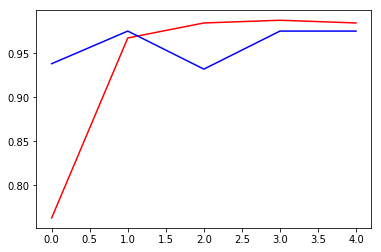

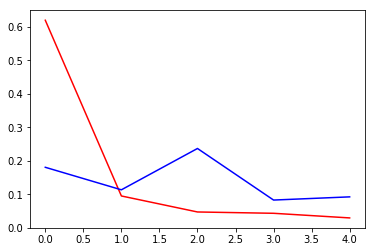

In [25]:
## No_finetuning

plt.figure(0)
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'b')

plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')

plt.show()

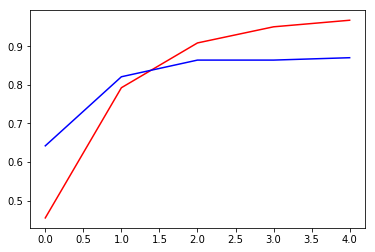

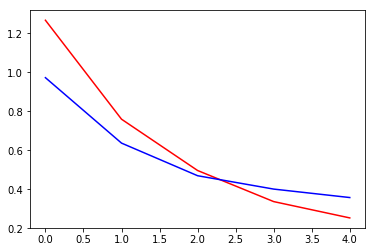

In [42]:
## finetuning

plt.figure(0)
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'b')

plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')

plt.show()